In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [2]:
os.chdir("/Users/sanyas/Desktop")

In [3]:
DatabaseDF = pd.read_csv("CleanedDataset.csv")

In [4]:
DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

In [5]:
DatabaseDF.describe() # Basic overview of the data

Unnamed: 0  Lateral Length        Stages     Township          Range  \
count  10856.000000    10848.000000  10688.000000  10856.000000  10856.000000   
mean    5427.500000     8914.655476     27.997754    152.173729     95.914886   
std     3134.001595     1833.823556     10.989723      4.829458      3.479933   
min        0.000000        3.000000      1.000000    139.000000     89.000000   
25%     2713.750000     8916.000000     22.000000    149.000000     93.000000   
50%     5427.500000     9427.000000     30.000000    152.000000     96.000000   
75%     8141.250000     9799.000000     34.000000    155.000000     99.000000   
max    10855.000000    22231.000000     94.000000    164.000000    105.000000   

            Section  Total Prop, lbs    Fluid, bbls  Best1 Mo BOPD  \
count  10856.000000     1.085600e+04   10839.000000    9306.000000   
mean      18.198047     3.332069e+06   69222.382305     491.904380   
std       10.444299     2.364422e+06   58068.128933     273.763722   
min        1.000000     0.000000e+00       0.000000       1.873767   
25%        9.000000     1.999804e+06   34778.000000     291.157133   
50%       18.000000     2.958260e+06   55127.000000     454.043393   
75%       27.000000     3.879750e+06   80064.000000     640.828402   
max       36.000000     2.874457e+07  598562.000000    2264.727153   

       Best3 Mo BOPD  ...      Latitude     Longitude  SPACING_CAPPED  \
count    9200.000000  ...  10856.000000  10856.000000    10847.000000   
mean      394.693351  ...     47.995412   -102.976506      596.784559   
std       217.153189  ...      0.420657      0.451102      110.862786   
min         1.873767  ...     46.804382   -104.044496       18.074815   
25%       238.242384  ...     47.759769   -103.324524      578.587387   
50%       362.354810  ...     47.993790   -102.928989      660.000000   
75%       506.618453  ...     48.238771   -102.617006      660.000000   
max      1819.044488  ...     48.994837   -102.071631      660.000000   

       12 month Cum Prod      Sleeves          P&P  Frac Ports  \
count       10856.000000  4556.000000  5180.000000   17.000000   
mean           98.421863    27.581870    28.950772   25.470588   
std            54.173541     9.879565    10.537756   10.966527   
min             0.280000     1.000000     1.000000    1.000000   
25%            60.917500    22.000000    24.000000   19.000000   
50%            88.970000    30.000000    30.000000   20.000000   
75%           124.847500    34.000000    35.000000   37.000000   
max           495.810000    80.000000    89.000000   37.000000   

       Repeater Ports         CT  Year Drilled  
count        5.000000  15.000000  10848.000000  
mean        20.000000  70.600000   2012.425608  
std          9.027735  19.393666      2.208918  
min         15.000000  30.000000   2004.000000  
25%         15.000000  55.500000   2011.000000  
50%         16.000000  78.000000   2013.000000  
75%         18.000000  85.000000   2014.000000  
max         36.000000  94.000000   2017.000000  

[8 rows x 23 columns]

We are able to see the general breakdown of the data and the overview of each of the features. Dataframe.describe() allows us to see the overall data we are working with 

In [6]:
DatabaseDF.shape 

(10856, 30)

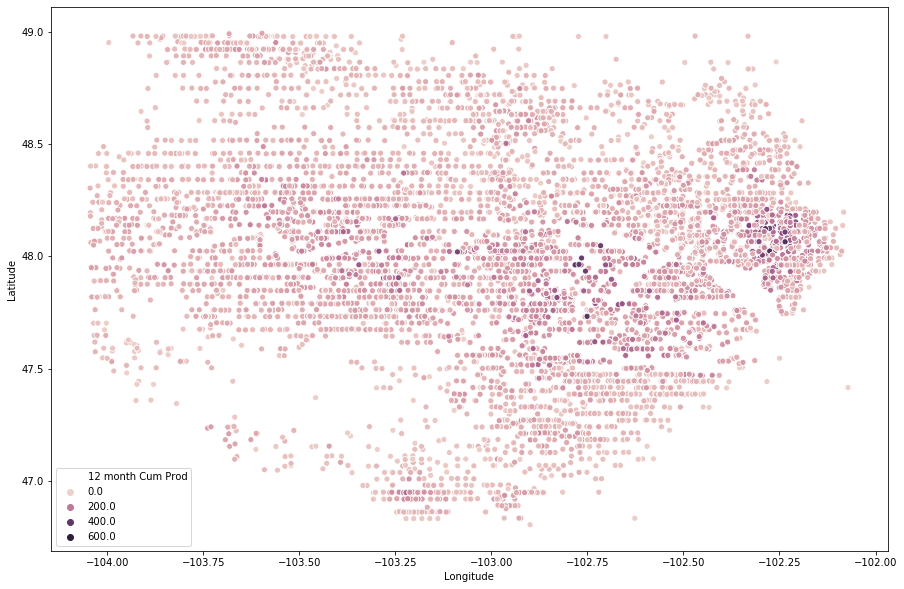

In [7]:
plt.subplots(figsize = (15,10)) # Scatter plot that takes longitude and latitude with relation to cumulative prod
sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = '12 month Cum Prod',data = DatabaseDF)

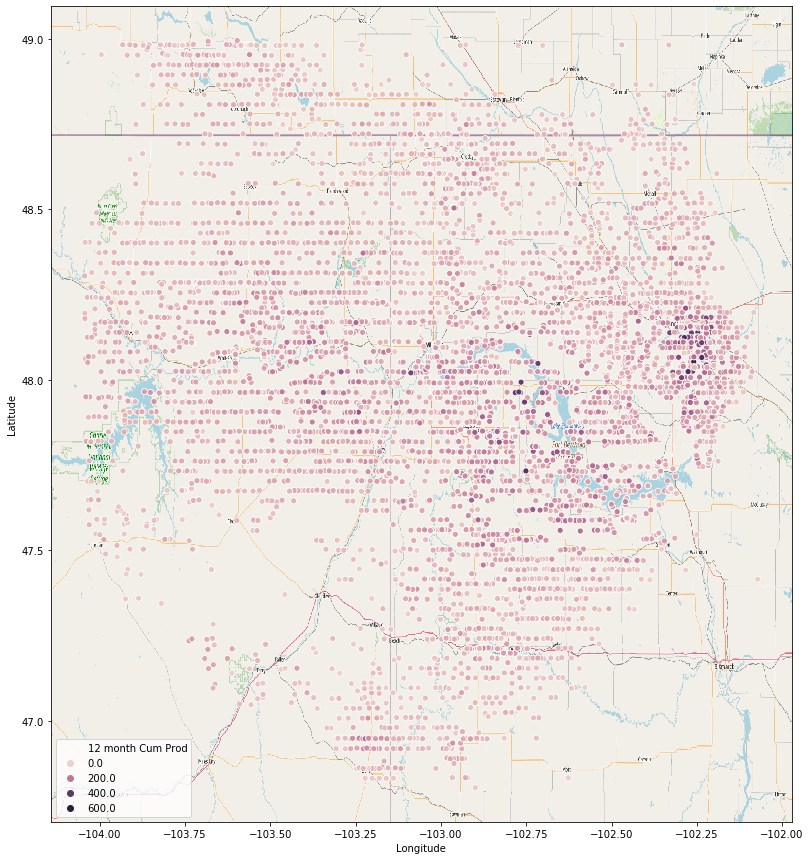

In [8]:
# add map beneath the scatterplot to oversee the region, creation of Dot Map

padding = .1

BBox = ((DatabaseDF.Longitude.min() - padding,   DatabaseDF.Longitude.max() + padding,      
         DatabaseDF.Latitude.min() - padding, DatabaseDF.Latitude.max() + padding))

areaMap = plt.imread("RegionMap.png")

fig, bx = plt.subplots(figsize = (15,10))

fig.set_size_inches(15,15)

bx = sns.scatterplot(x = DatabaseDF['Longitude'], y = DatabaseDF['Latitude'], hue = DatabaseDF['12 month Cum Prod'])
bx.set_xlim(BBox[0],BBox[1])
bx.set_ylim(BBox[2],BBox[3])

bx.imshow(areaMap, zorder = 0, extent = BBox, aspect = 'equal')

This is a Dot Map of the Wells based on Longitude and Latitude. The key shows the cumulative production over 12 months at these locations. We are able to pinpoint locations which have the most production in oil which is between Longitude of -102.5 - -102.25 and latitude of 48 - 48.5. As we can see, the overall most produced oil is in the East region of the map. 

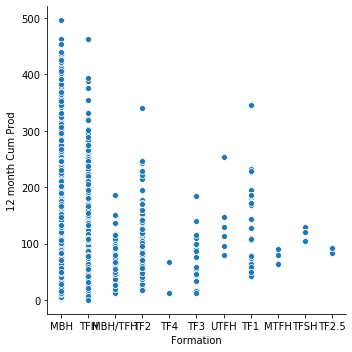

In [9]:
sns.relplot(x = "Formation", y = "12 month Cum Prod", data = DatabaseDF) # scatterplt for formation

MBH Formation has most production compared to other formations

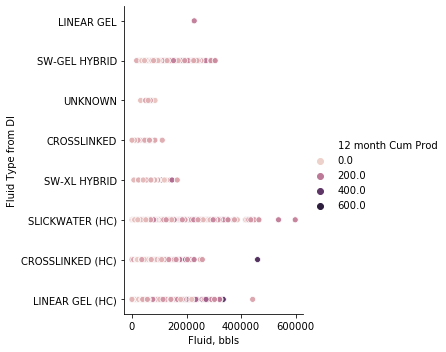

In [10]:
sns.relplot(x = "Fluid, bbls", y = "Fluid Type from DI", hue = '12 month Cum Prod', data = DatabaseDF)

Linear Gel greater than 200000 Fluid bbls will produce the most oil. Based on the fluid type going in, Linear Gel is the most effective

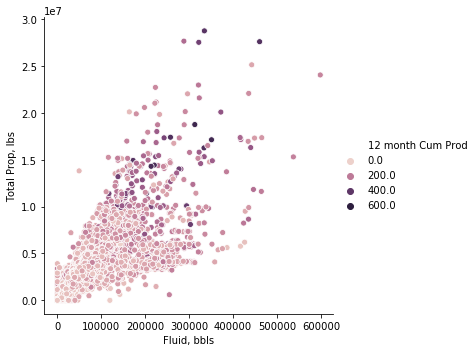

In [11]:
sns.relplot(x = "Fluid, bbls", y = "Total Prop, lbs", hue = '12 month Cum Prod', data = DatabaseDF)

Fluid, bbls greater than 200000 and total prop. lbs greater than 1 lbs will more than likely produce most oil optimization

In [12]:
!pip install geopandas

In [13]:
import geopandas as gpd           # importing geopandas

In [14]:
os.chdir("/Users/sanyas/Desktop/NDGISHubData")

In [16]:
map_df = gpd.read_file("NDHUB.PLSSTOWNSHIPS_polygon.shp") # Load a shape file read by geopandas

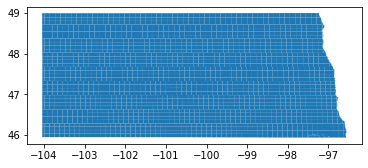

In [17]:
map_df.plot()

In [18]:
gdf = gpd.GeoDataFrame(DatabaseDF, geometry=gpd.points_from_xy(DatabaseDF.Longitude, DatabaseDF.Latitude))
# Take the data base and make a geopandas point with latitude and longitude

In [19]:
print(gdf.head())

   Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  SPACING_CAPPED  \
0        141     99       10              0.0  ...           660.0   
1        142     99       16         418000.0  ...           660.0   
2        142     99       24         568407.0  ...           660.0   
3        142     99        1         845000.0  ...           660.0   
4        142     99       35         297366.0  ...           660.0   

  12 month Cum Prod  Completion Type  Sleeves  P&P  Frac Ports  \
0             33.55              NaN      NaN  NaN         NaN   
1       

In [21]:
merged = gpd.sjoin(map_df, gdf, how="inner", op='intersects') # Merge new map of ND and the current database

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [22]:
merged.head()

OBJECTID  TOWNSHIP TDIR  RANGE RDIR  TWPRNG TWPTEXT RNGTEXT  TWPRNGTEXT  \
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   

   AREA_MI2  ...  Fluid Type from DI  SPACING_CAPPED  12 month Cum Prod  \
5  35.29072  ...                 NaN       589.66871              92.97   
5  35.29072  ...                 NaN       660.00000              51.41   
5  35.29072  ...                 NaN       660.00000              71.33   
5  35.29072  ...                 NaN       660.00000              37.93   
5  35.29072  ...                 NaN       660.00000              76.78   

  Completion Type  Sleeves   P&P Frac Ports Repeater Ports  CT  Year Drilled  
5         Sleeves     18.0   NaN        NaN            NaN NaN        2010.0  
5         Sleeves     10.0   NaN        NaN            NaN NaN        2008.0  
5           P & P      NaN   6.0        NaN            NaN NaN        2008.0  
5           P & P      NaN  12.0        NaN            NaN NaN        2009.0  
5         Sleeves     12.0   NaN        NaN            NaN NaN        2010.0  

[5 rows x 45 columns]

In [23]:
merged.describe()

OBJECTID      TOWNSHIP         RANGE         TWPRNG      AREA_MI2  \
count  10856.000000  10856.000000  10856.000000   10856.000000  10856.000000   
mean    1464.019713    152.173545     95.914794  152269.459377     35.764179   
std      317.042387      4.829445      3.479838    4829.407026      2.259759   
min      598.000000    139.000000     89.000000  139095.000000      7.255679   
25%     1259.000000    149.000000     93.000000  149101.000000     35.804911   
50%     1426.000000    152.000000     96.000000  152099.000000     35.914094   
75%     1746.000000    155.000000     99.000000  155095.000000     36.027256   
max     2062.000000    164.000000    105.000000  164102.000000     37.315742   

         AREA_ACRES    SHAPE_AREA     SHAPE_LEN   index_right    Unnamed: 0  \
count  10856.000000  10856.000000  10856.000000  10856.000000  10856.000000   
mean   22889.074390      0.011159      0.430692   5427.500000   5427.500000   
std     1446.245584      0.000709      0.013225   3134.001595   3134.001595   
min     4643.634440      0.002306      0.277770      0.000000      0.000000   
25%    22915.142848      0.011119      0.430029   2713.750000   2713.750000   
50%    22985.020242      0.011215      0.432164   5427.500000   5427.500000   
75%    23057.443544      0.011334      0.434129   8141.250000   8141.250000   
max    23882.074722      0.011528      0.437621  10855.000000  10855.000000   

       ...      Latitude     Longitude  SPACING_CAPPED  12 month Cum Prod  \
count  ...  10856.000000  10856.000000    10847.000000       10856.000000   
mean   ...     47.995412   -102.976506      596.784559          98.421863   
std    ...      0.420657      0.451102      110.862786          54.173541   
min    ...     46.804382   -104.044496       18.074815           0.280000   
25%    ...     47.759769   -103.324524      578.587387          60.917500   
50%    ...     47.993790   -102.928989      660.000000          88.970000   
75%    ...     48.238771   -102.617006      660.000000         124.847500   
max    ...     48.994837   -102.071631      660.000000         495.810000   

           Sleeves          P&P  Frac Ports  Repeater Ports         CT  \
count  4556.000000  5180.000000   17.000000        5.000000  15.000000   
mean     27.581870    28.950772   25.470588       20.000000  70.600000   
std       9.879565    10.537756   10.966527        9.027735  19.393666   
min       1.000000     1.000000    1.000000       15.000000  30.000000   
25%      22.000000    24.000000   19.000000       15.000000  55.500000   
50%      30.000000    30.000000   20.000000       16.000000  78.000000   
75%      34.000000    35.000000   37.000000       18.000000  85.000000   
max      80.000000    89.000000   37.000000       36.000000  94.000000   

       Year Drilled  
count  10848.000000  
mean    2012.425608  
std        2.208918  
min     2004.000000  
25%     2011.000000  
50%     2013.000000  
75%     2014.000000  
max     2017.000000  

[8 rows x 32 columns]

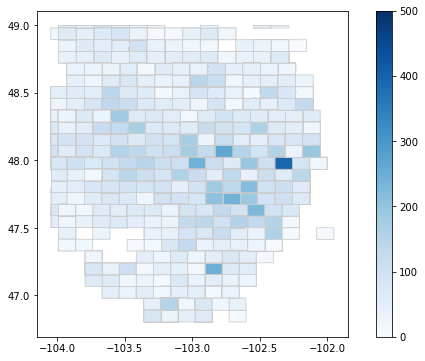

In [24]:
# set the value column that will be visualised
variable = '12 month Cum Prod'
# set the range for the choropleth values
vmin, vmax = 0, 500
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

Used PLSS Township as measure since Counties was too general to allow to see extent of oil production. It follows the similar idea of the 12 month cumulative production being focused on the east region of the map. 

In [25]:
pearsoncorr = DatabaseDF.corr(method = 'pearson')
pearsoncorr # Linear

Unnamed: 0  Lateral Length    Stages  Township      Range  \
Unnamed: 0           1.000000        0.053661  0.228829   0.243115  0.011720   
Lateral Length       0.053661        1.000000  0.456774  -0.038726  0.241831   
Stages               0.228829        0.456774  1.000000   0.040092  0.147589   
Township             0.243115       -0.038726  0.040092   1.000000 -0.011333   
Range                0.011720        0.241831  0.147589  -0.011333  1.000000   
Section             -0.050113       -0.021131  0.024033   0.023008 -0.019859   
Total Prop, lbs      0.203161        0.253713  0.587432  -0.005835 -0.021746   
Fluid, bbls          0.213521        0.256175  0.520606  -0.006636  0.194991   
Best1 Mo BOPD        0.094560        0.113087  0.265778  -0.121909 -0.164083   
Best3 Mo BOPD        0.096491        0.113343  0.263466  -0.110662 -0.192811   
Best6 Mo BOPD        0.104318        0.103529  0.251608  -0.101472 -0.216421   
Best9 Mo BOPD        0.114553        0.098252  0.242121  -0.092244 -0.226095   
Best12 Mo BOPD       0.121250        0.093744  0.227370  -0.081699 -0.238771   
Latitude             0.245966       -0.037672  0.038070   0.998011 -0.009201   
Longitude           -0.052245       -0.233496 -0.154342  -0.145898 -0.983505   
SPACING_CAPPED      -0.107073       -0.147507 -0.245130   0.014882  0.009955   
12 month Cum Prod    0.119804        0.147342  0.344700  -0.114935 -0.194452   
Sleeves              0.186390        0.391450  0.894700   0.061510  0.112901   
P&P                  0.173148        0.528658  0.880684  -0.008466  0.133063   
Frac Ports          -0.711513       -0.087372  0.193914  -0.756806  0.602259   
Repeater Ports       0.535451        0.349897  0.078326   0.716801  0.045222   
CT                   0.191782        0.391838  0.983473   0.011609 -0.185800   
Year Drilled         0.186718        0.313809  0.718240  -0.001583  0.164663   

                    Section  Total Prop, lbs  Fluid, bbls  Best1 Mo BOPD  \
Unnamed: 0        -0.050113         0.203161     0.213521       0.094560   
Lateral Length    -0.021131         0.253713     0.256175       0.113087   
Stages             0.024033         0.587432     0.520606       0.265778   
Township           0.023008        -0.005835    -0.006636      -0.121909   
Range             -0.019859        -0.021746     0.194991      -0.164083   
Section            1.000000         0.020073     0.017878       0.010863   
Total Prop, lbs    0.020073         1.000000     0.714701       0.371468   
Fluid, bbls        0.017878         0.714701     1.000000       0.241188   
Best1 Mo BOPD      0.010863         0.371468     0.241188       1.000000   
Best3 Mo BOPD      0.012004         0.408457     0.260443       0.964461   
Best6 Mo BOPD      0.010873         0.422335     0.276661       0.930272   
Best9 Mo BOPD      0.007916         0.422783     0.290054       0.912720   
Best12 Mo BOPD     0.005923         0.417017     0.281228       0.902600   
Latitude          -0.037652        -0.007611    -0.008240      -0.123385   
Longitude          0.016787         0.020765    -0.194170       0.181494   
SPACING_CAPPED    -0.010710        -0.161274    -0.166497      -0.131038   
12 month Cum Prod  0.004276         0.480937     0.392504       0.874867   
Sleeves            0.033284         0.501151     0.346689       0.196826   
P&P                0.008336         0.553368     0.542364       0.206115   
Frac Ports         0.459620         0.469282     0.579526       0.328419   
Repeater Ports    -0.436849         0.004144     0.173785      -0.593844   
CT                 0.098984        -0.487679    -0.499150       0.445904   
Year Drilled       0.029651         0.535724     0.538226       0.193007   

                   Best3 Mo BOPD  ...  Latitude  Longitude  SPACING_CAPPED  \
Unnamed: 0              0.096491  ...  0.245966  -0.052245       -0.107073   
Lateral Length          0.113343  ... -0.037672  -0.233496       -0.147507   
Stages                  0.263466  ...  

In [26]:
spearmancorr = DatabaseDF.corr(method = 'spearman')
spearmancorr # Association

Unnamed: 0  Lateral Length    Stages  Township      Range  \
Unnamed: 0           1.000000        0.077660  0.232800   0.381223  0.006677   
Lateral Length       0.077660        1.000000  0.435665   0.018391  0.181624   
Stages               0.232800        0.435665  1.000000   0.052379  0.162301   
Township             0.381223        0.018391  0.052379   1.000000 -0.018511   
Range                0.006677        0.181624  0.162301  -0.018511  1.000000   
Section             -0.049775       -0.030477  0.029076   0.025329 -0.020666   
Total Prop, lbs      0.243052        0.326196  0.658696   0.010163  0.133176   
Fluid, bbls          0.198040        0.307917  0.630845  -0.021137  0.274213   
Best1 Mo BOPD        0.127087        0.141420  0.251405  -0.174974 -0.121818   
Best3 Mo BOPD        0.129392        0.142319  0.244439  -0.165998 -0.144633   
Best6 Mo BOPD        0.138687        0.138227  0.236417  -0.159837 -0.168528   
Best9 Mo BOPD        0.153217        0.137477  0.230398  -0.149234 -0.178319   
Best12 Mo BOPD       0.161778        0.138404  0.221871  -0.138549 -0.192458   
Latitude             0.385105        0.021630  0.050454   0.997491 -0.014452   
Longitude           -0.044463       -0.185652 -0.171085  -0.123387 -0.983496   
SPACING_CAPPED      -0.118379       -0.184828 -0.291524   0.036315 -0.020250   
12 month Cum Prod    0.145759        0.177257  0.340166  -0.165085 -0.157996   
Sleeves              0.203367        0.405629  0.908350   0.104709  0.138849   
P&P                  0.178904        0.424934  0.877969   0.022196  0.162309   
Frac Ports          -0.575608        0.028158  0.301994  -0.688001  0.449071   
Repeater Ports       0.666886        0.872082  0.229416   0.666886  0.648886   
CT                   0.176944        0.480787  1.000000  -0.172964  0.164849   
Year Drilled         0.184971        0.312223  0.648229  -0.039493  0.167011   

                    Section  Total Prop, lbs  Fluid, bbls  Best1 Mo BOPD  \
Unnamed: 0        -0.049775         0.243052     0.198040       0.127087   
Lateral Length    -0.030477         0.326196     0.307917       0.141420   
Stages             0.029076         0.658696     0.630845       0.251405   
Township           0.025329         0.010163    -0.021137      -0.174974   
Range             -0.020666         0.133176     0.274213      -0.121818   
Section            1.000000         0.025029     0.021621       0.018478   
Total Prop, lbs    0.025029         1.000000     0.856374       0.320731   
Fluid, bbls        0.021621         0.856374     1.000000       0.282209   
Best1 Mo BOPD      0.018478         0.320731     0.282209       1.000000   
Best3 Mo BOPD      0.016098         0.331295     0.291956       0.970644   
Best6 Mo BOPD      0.014221         0.341549     0.303256       0.944792   
Best9 Mo BOPD      0.008519         0.340211     0.300534       0.933109   
Best12 Mo BOPD     0.005373         0.332345     0.289592       0.925056   
Latitude          -0.036515         0.008453    -0.022095      -0.177390   
Longitude          0.017142        -0.136473    -0.272063       0.139445   
SPACING_CAPPED    -0.017271        -0.279404    -0.289765      -0.220560   
12 month Cum Prod  0.010521         0.440060     0.401960       0.891192   
Sleeves            0.039962         0.529296     0.507377       0.184210   
P&P                0.009927         0.615773     0.629173       0.188430   
Frac Ports         0.319731         0.424671     0.680200       0.204660   
Repeater Ports    -0.205196         0.564288    -0.205196      -0.820783   
CT                 0.008116        -0.151921    -0.066131       0.495085   
Year Drilled       0.032135         0.611360     0.649717       0.206711   

                   Best3 Mo BOPD  ...  Latitude  Longitude  SPACING_CAPPED  \
Unnamed: 0              0.129392  ...  0.385105  -0.044463       -0.118379   
Lateral Length          0.142319  ...  0.021630  -0.185652       -0.184828   
Stages                  0.244439  ...  

In [27]:
kencorr = DatabaseDF.corr(method = 'kendall')
kencorr

Unnamed: 0  Lateral Length    Stages  Township      Range  \
Unnamed: 0           1.000000        0.052686  0.168437   0.358195  0.004109   
Lateral Length       0.052686        1.000000  0.309936   0.012854  0.125361   
Stages               0.168437        0.309936  1.000000   0.037471  0.115880   
Township             0.358195        0.012854  0.037471   1.000000 -0.016345   
Range                0.004109        0.125361  0.115880  -0.016345  1.000000   
Section             -0.033591       -0.020888  0.020303   0.017285 -0.014719   
Total Prop, lbs      0.167874        0.222342  0.502807   0.006452  0.094244   
Fluid, bbls          0.141531        0.207519  0.471214  -0.013354  0.193712   
Best1 Mo BOPD        0.084968        0.095635  0.177771  -0.122942 -0.085576   
Best3 Mo BOPD        0.086246        0.096264  0.172709  -0.117739 -0.101709   
Best6 Mo BOPD        0.092149        0.093617  0.166510  -0.113522 -0.118404   
Best9 Mo BOPD        0.101689        0.093220  0.162161  -0.106005 -0.124791   
Best12 Mo BOPD       0.107112        0.094011  0.155649  -0.098384 -0.134474   
Latitude             0.352100        0.014574  0.035094   0.967689 -0.012843   
Longitude           -0.028989       -0.123547 -0.116569  -0.081553 -0.913127   
SPACING_CAPPED      -0.090092       -0.135229 -0.224938   0.026258 -0.014247   
12 month Cum Prod    0.097114        0.120099  0.242970  -0.119089 -0.110660   
Sleeves              0.151749        0.286365  0.886579   0.074185  0.094662   
P&P                  0.125591        0.303404  0.876172   0.013643  0.121660   
Frac Ports          -0.462069        0.024845  0.234765  -0.564815  0.344016   
Repeater Ports       0.527046        0.737865  0.125988   0.527046  0.471405   
CT                   0.153112        0.382780  1.000000  -0.156795  0.198583   
Year Drilled         0.160334        0.226446  0.522863  -0.028170  0.120057   

                    Section  Total Prop, lbs  Fluid, bbls  Best1 Mo BOPD  \
Unnamed: 0        -0.033591         0.167874     0.141531       0.084968   
Lateral Length    -0.020888         0.222342     0.207519       0.095635   
Stages             0.020303         0.502807     0.471214       0.177771   
Township           0.017285         0.006452    -0.013354      -0.122942   
Range             -0.014719         0.094244     0.193712      -0.085576   
Section            1.000000         0.017026     0.014576       0.012530   
Total Prop, lbs    0.017026         1.000000     0.671173       0.219196   
Fluid, bbls        0.014576         0.671173     1.000000       0.193036   
Best1 Mo BOPD      0.012530         0.219196     0.193036       1.000000   
Best3 Mo BOPD      0.010970         0.227002     0.200793       0.857700   
Best6 Mo BOPD      0.009663         0.233923     0.209223       0.801267   
Best9 Mo BOPD      0.005765         0.232325     0.207627       0.778392   
Best12 Mo BOPD     0.003652         0.226341     0.200104       0.764052   
Latitude          -0.036827         0.005248    -0.013505      -0.121036   
Longitude          0.011810        -0.092848    -0.185686       0.094545   
SPACING_CAPPED    -0.012705        -0.206224    -0.213262      -0.164380   
12 month Cum Prod  0.007134         0.307798     0.281894       0.726456   
Sleeves            0.028297         0.391270     0.378290       0.129416   
P&P                0.006999         0.469789     0.471592       0.133937   
Frac Ports         0.250313         0.346552     0.573886       0.165025   
Repeater Ports    -0.316228         0.316228    -0.105409      -0.737865   
CT                 0.019913        -0.114834    -0.019139       0.382780   
Year Drilled       0.023110         0.466560     0.498299       0.150646   

                   Best3 Mo BOPD  ...  Latitude  Longitude  SPACING_CAPPED  \
Unnamed: 0              0.086246  ...  0.352100  -0.028989       -0.090092   
Lateral Length          0.096264  ...  0.014574  -0.123547       -0.135229   
Stages                  0.172709  ...  

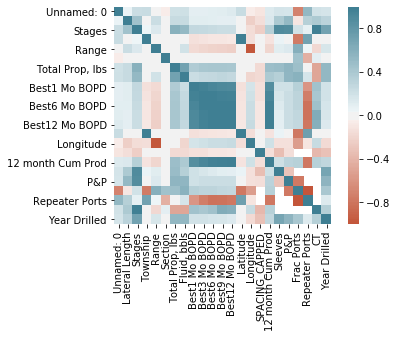

In [29]:
# Heat map with correlation type
ax = sns.heatmap(pearsoncorr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

We are able to see the the linear relationship between the different variables based on the pearson correlation, and how are correlated these values are and what relationship do these values have to each other. We can see that Best Month data and 12 month cumulative production has a strong correlation. Additionally, we can see that Latitude and repeater ports have a strong relation and 12 month cumulative production has a strong linear correlation with repeater ports as well.

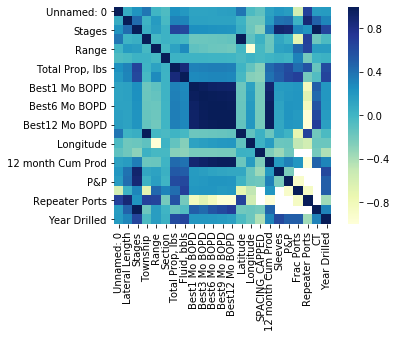

In [28]:
ax = sns.heatmap(spearmancorr, vmin=-1, vmax=1, center=0,cmap= 'YlGnBu',square=True)

This Correlation looks at the association between the variables. For example, there is a strong association between the total proppant and P&P. This allows us to know some type of association between the variables

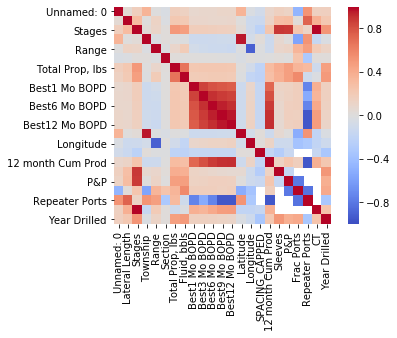

In [30]:
ax = sns.heatmap(kencorr, vmin=-1, vmax=1, center=0,cmap='coolwarm',square=True) # Similar function as above

In [31]:
!pip install plotly

In [35]:
# creating a parallel coordinates graph based on different variables. 
# this plot uses total prop, latitude, fluids, and cumulative production, THIS IS A TEST PLOT


import plotly.graph_objects as go

df = DatabaseDF

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['Unnamed: 0'], 
                   showscale = True,
                   cmin = 0,
                   cmax = 10856),      
        dimensions = list([
            dict(range = [0,30000000],
                constraintrange = [4,8],
                label = 'Total Prop, lbs', values = df['Total Prop, lbs']),
            dict(range = [0,600000],
                label = 'Fluid, bbls', values = df['Fluid, bbls']),
            dict(range = [46.8,49],
                label = 'Latitude', values = df['Latitude']),
            dict(range = [0,500],
                label = 'Production', values = df['12 month Cum Prod']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

This parallel plot is a test to see if there is some relation between these variables. It is clear that most of the concentrated Total prop is between 0 - 10 M to get the cumulative production between 0 - 200. These are some of the understandings from the parallel plot

In [41]:
# Noticed a relationship between the Stages and Range and Total props for cumulative production

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['Unnamed: 0'],
                   showscale = True,
                   cmin = 0,
                   cmax = 10856),
        dimensions = list([
            dict(range = [0,95],
                constraintrange = [4,8],
                label = 'Stages', values = df['Stages']),
            dict(range = [80,105],
                label = 'Range', values = df['Range']),
            dict(range = [0,30000000],
                label = 'Total Prop', values = df['Total Prop, lbs']),
            dict(range = [0,500],
                label = 'Production', values = df['12 month Cum Prod']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

Although the stages are all over the line, the range is concentrated between 89 - 105. Along with a Total proppant of 5 - 10 M, allows for a cumulative production of 100 - 200. To get the most production, it seems as the stage has to be between 40 - 60, while the range is in the 90s. Total Proppant must be higher than usual, between 15 M - 20 M to get the higher production. 

In [42]:
# Relationship between all productions 

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['Unnamed: 0'],
                   showscale = True,
                   cmin = 0,
                   cmax = 10856),
        dimensions = list([
            dict(range = [0,2300],
                constraintrange = [4,8],
                label = 'Month 1', values = df['Best1 Mo BOPD']),
            dict(range = [0,1820],
                label = 'Month 3', values = df['Best3 Mo BOPD']),
            dict(range = [8,1640],
                label = 'Month 6', values = df['Best6 Mo BOPD']),
            dict(range = [6,1460],
                label = 'Month 9', values = df['Best9 Mo BOPD']),
            dict(range = [5,1391],
                label = 'Month 9', values = df['Best12 Mo BOPD']),
            dict(range = [0,500],
                label = 'Production', values = df['12 month Cum Prod']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

We can understand the overall change in production